In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book=pd.read_csv('C:/ExcelR/Data Scientist/Association Rules/book.csv',encoding= 'unicode_escape')

In [3]:
book.shape

(2000, 11)

In [4]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Support =0.05

In [5]:
frequent_itemsets = apriori(book, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(YouthBks, GeogBks, ArtBks, CookBks)"
97,0.0650,"(DoItYBks, CookBks, GeogBks, ArtBks)"
98,0.0510,"(ChildBks, YouthBks, GeogBks, DoItYBks, CookBks)"


In [6]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
130,"(ChildBks, GeogBks, ArtBks, CookBks)",(DoItYBks),0.0835,0.282,0.0535,0.640719,2.272052,0.029953,1.998433
131,"(ChildBks, DoItYBks, GeogBks, CookBks)",(ArtBks),0.0890,0.241,0.0535,0.601124,2.494289,0.032051,1.902845
132,"(ChildBks, DoItYBks, CookBks, ArtBks)",(GeogBks),0.0820,0.276,0.0535,0.652439,2.363910,0.030868,2.083088
133,"(DoItYBks, GeogBks, ArtBks, CookBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


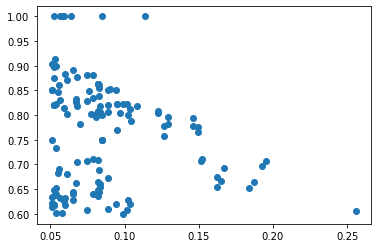

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x='support',y='confidence',data=rules)

In [8]:
rules.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
28,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
52,"(DoItYBks, ItalCook)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf
57,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf
58,"(ItalCook, GeogBks)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf
...,...,...,...,...,...,...,...,...,...
50,"(CookBks, ArtBks)",(DoItYBks),0.1670,0.282,0.1015,0.607784,2.155264,0.054406,1.830626
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
131,"(ChildBks, DoItYBks, GeogBks, CookBks)",(ArtBks),0.0890,0.241,0.0535,0.601124,2.494289,0.032051,1.902845
46,"(YouthBks, RefBks)",(DoItYBks),0.0965,0.282,0.0580,0.601036,2.131334,0.030787,1.799662


In [9]:
rules[rules.lift<1.9]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
7,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556


# Support=0.12

In [10]:
frequent_itemsets_2 = apriori(book, min_support=0.12, use_colnames=True)
frequent_itemsets_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [11]:
rules_2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.75)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
1,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
2,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
3,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
5,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
6,"(ChildBks, ArtBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403
7,"(CookBks, ArtBks)",(ChildBks),0.1670,0.423,0.1265,0.757485,1.790745,0.055859,2.379235
8,"(ChildBks, GeogBks)",(CookBks),0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571
9,"(CookBks, GeogBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081


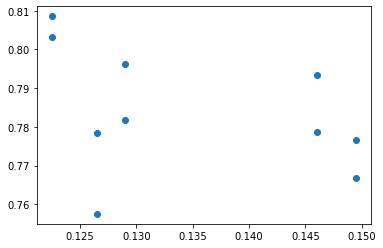

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x='support',y='confidence',data=rules_2)

In [13]:
rules_2.sort_values('confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(CookBks, ArtBks)",(ChildBks),0.1670,0.423,0.1265,0.757485,1.790745,0.055859,2.379235
8,"(ChildBks, GeogBks)",(CookBks),0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571
9,"(CookBks, GeogBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081
6,"(ChildBks, ArtBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403
3,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
0,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
2,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
1,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
5,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534


In [14]:
rules_2[rules_2.lift<1.85]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
2,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
3,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
6,"(ChildBks, ArtBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403
7,"(CookBks, ArtBks)",(ChildBks),0.1670,0.423,0.1265,0.757485,1.790745,0.055859,2.379235
8,"(ChildBks, GeogBks)",(CookBks),0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571
9,"(CookBks, GeogBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081


# Support=0.15

In [15]:
frequent_itemsets_3 = apriori(book, min_support=0.15, use_colnames=True)
frequent_itemsets_3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [16]:
rules_3 = association_rules(frequent_itemsets_3, metric="lift", min_threshold=0.55)
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


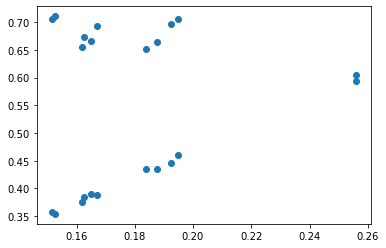

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x='support',y='confidence',data=rules_3)

In [18]:
rules_3.sort_values('lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
15,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
14,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


In [19]:
rules_3[rules_3.confidence>0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
5,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
7,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
9,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
11,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
12,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
14,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
17,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
